# Bifurcation & Hysteresis Revisited

I wanted us to revisit the concept of hyteresis and to provide the code needed to visualized the effect of hysteresis.

The definition of hysteresis : "the phenomenon in which the value of a physical property lags behind changes in the agent causing it"

# Hysteresis in action

We will use our equation, $\dot{x} = rx+x^3-x^5$, to see hysteresis in action. In a complex bifurcation, two things impact the steadystate our solutions evolve to:

1. the initial condition
2. the value of r

In the code below, we run a simulation where

1. We start at $x_0 = 0.2$ and simulate our system until we reach steadystate
2. After we reach steadystate, we change the value of r and simulate our system again until we reach steadystate
3. We do this first with increasing values of r and then decreasing values of r
4. The code and results are below.

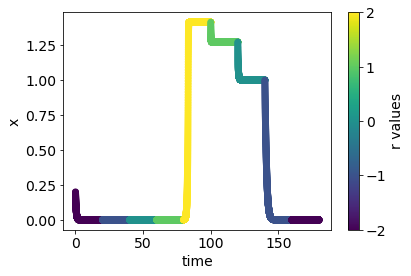

In [ ]:
# Import the required modules
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint

import time

def dxdt(x,t,r):
    dxdt = r*x+x**3-x**5;
    return dxdt

timesteps = np.arange(0,20,0.01)
x0 = 0.2  # the initial condition

# Set variables to collect later.
out_x = out_t = out_r= [];

for r in (-2,-1,0,1,2,1,0,-1,-2):

    # args must be a tuple, which is annnoying. A 1 element tuple needs a comma.
    # This doesn't effect tuples of more elements
    x = odeint(dxdt, x0, timesteps, args=(r,))

    # Collect data for plotting
    out_x = np.append(out_x,x);
    out_t = np.append(out_t,timesteps);
    out_r = np.append(out_r,[r]*len(timesteps));
    
    # Update time steps and initial conditions for next loop
    timesteps = timesteps+20;
    x0 = x[-1] + 10**-12;
    
# Plot result
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("time")
plt.ylabel("x")
plt.scatter(out_t, out_x, c= out_r);
cbar = plt.colorbar()
cbar.set_label('r values');



# Results

As our solution evolves with changing values in r, there are 3 notable observations:
1. As r went from 1 to 2, the value of x jumps dramatically
2. After the jump at r = 2, we began reducing the value of r, **but it does not jump back down**. Instead for r = 1 and r = 0, the value of x at steadystate just drops a little but remains well above zero.
3. And finally, after r is lowered to -1, then we finally see the solution of x drop back down to zero.

That in a nutshell is hysteresis!

# Wait, why did it jump to the positive steadystate and not the negative??

**All Simulations Have Error**

Noise and error will ultimately drive the direction of the solution!! Here, I am forcing the error to be in a certain direction (hint: *look at the code*).

But if you remove the small number I add to the initial condition, you'll find that the simulator does some odd things. Sometimes it will jump to the new steadystates at the correct value of r, but sometimes the solution near the unstable steadystate will remain stable longer and then jump to the new steadystate at higher values of r.

# Another way to visualize

Instead of x versus time, we can plot x versus r to see the solution evolving in time.

In [ ]:
# Import the required modules
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint

import time

def dxdt(x,t,r):
    dxdt = r*x+x**3-x**5;
    return dxdt

timesteps = np.arange(0,20,0.01)
x0 = 0.2  # the initial condition

# Set variables to collect later.
out_x = out_t = out_r= [];

z = np.arange(-1,1,.01);
z = np.append(z,list(reversed(z)));

for r in z:

    # args must be a tuple, which is annnoying. A 1 element tuple needs a comma.
    # This doesn't effect tuples of more elements
    x = odeint(dxdt, x0, timesteps, args=(r,))

    # Collect data for plotting
    out_x = np.append(out_x,x);
    out_t = np.append(out_t,timesteps);
    out_r = np.append(out_r,[r]*len(timesteps));
    
    # Update time steps and initial conditions for next loop
    timesteps = timesteps+20;
    x0 = x[-1] - 10**-12;
    


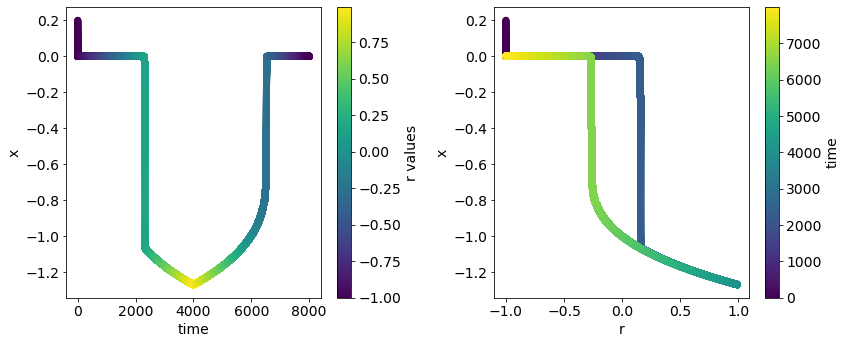

In [ ]:
# Plot result
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.rcParams['figure.figsize'] = [12, 5]

plt.subplot(1,2,1);
plt.xlabel("time")
plt.ylabel("x")
plt.scatter(out_t, out_x, c= out_r);
cbar = plt.colorbar()
cbar.set_label('r values');


plt.subplot(1,2,2);
plt.xlabel("r")
plt.ylabel("x")
plt.scatter(out_r, out_x, c= out_t);
cbar = plt.colorbar()
cbar.set_label('time');

plt.tight_layout()